# 第8章: ニューラルネット
第6章で取り組んだニュース記事のカテゴリ分類を題材として，ニューラルネットワークでカテゴリ分類モデルを実装する．なお，この章ではPyTorch, TensorFlow, Chainerなどの機械学習プラットフォームを活用せよ．

## 70. 単語ベクトルの和による特徴量
***
問題50で構築した学習データ，検証データ，評価データを行列・ベクトルに変換したい．例えば，学習データについて，すべての事例$x_i$の特徴ベクトル$\boldsymbol{x}_i$を並べた行列$X$と正解ラベルを並べた行列（ベクトル）$Y$を作成したい．

$$
X = \begin{pmatrix} 
  \boldsymbol{x}_1 \\ 
  \boldsymbol{x}_2 \\ 
  \dots \\ 
  \boldsymbol{x}_n \\ 
\end{pmatrix} \in \mathbb{R}^{n \times d},
Y = \begin{pmatrix} 
  y_1 \\ 
  y_2 \\ 
  \dots \\ 
  y_n \\ 
\end{pmatrix} \in \mathbb{N}^{n}
$$

ここで，$n$は学習データの事例数であり，$\boldsymbol x_i \in \mathbb{R}^d$と$y_i \in \mathbb N$はそれぞれ，$i \in \{1, \dots, n\}$番目の事例の特徴量ベクトルと正解ラベルを表す．
なお，今回は「ビジネス」「科学技術」「エンターテイメント」「健康」の4カテゴリ分類である．$\mathbb N_{<4}$で$4$未満の自然数（$0$を含む）を表すことにすれば，任意の事例の正解ラベル$y_i$は$y_i \in \mathbb N_{<4}$で表現できる．
以降では，ラベルの種類数を$L$で表す（今回の分類タスクでは$L=4$である）．

$i$番目の事例の特徴ベクトル$\boldsymbol x_i$は，次式で求める．

$$\boldsymbol x_i = \frac{1}{T_i} \sum_{t=1}^{T_i} \mathrm{emb}(w_{i,t})$$

ここで，$i$番目の事例は$T_i$個の（記事見出しの）単語列$(w_{i,1}, w_{i,2}, \dots, w_{i,T_i})$から構成され，$\mathrm{emb}(w) \in \mathbb{R}^d$は単語$w$に対応する単語ベクトル（次元数は$d$）である．すなわち，$i$番目の事例の記事見出しを，その見出しに含まれる単語のベクトルの平均で表現したものが$\boldsymbol x_i$である．今回は単語ベクトルとして，問題60でダウンロードしたものを用いればよい．$300$次元の単語ベクトルを用いたので，$d=300$である．
$i$番目の事例のラベル$y_i$は，次のように定義する．

$$
y_i = \begin{cases}
0 & (\mbox{記事}\boldsymbol x_i\mbox{が「ビジネス」カテゴリの場合}) \\
1 & (\mbox{記事}\boldsymbol x_i\mbox{が「科学技術」カテゴリの場合}) \\
2 & (\mbox{記事}\boldsymbol x_i\mbox{が「エンターテイメント」カテゴリの場合}) \\
3 & (\mbox{記事}\boldsymbol x_i\mbox{が「健康」カテゴリの場合}) \\
\end{cases}
$$

なお，カテゴリ名とラベルの番号が一対一で対応付いていれば，上式の通りの対応付けでなくてもよい．

以上の仕様に基づき，以下の行列・ベクトルを作成し，ファイルに保存せよ．

+ 学習データの特徴量行列: $X_{\rm train} \in \mathbb{R}^{N_t \times d}$
+ 学習データのラベルベクトル: $Y_{\rm train} \in \mathbb{N}^{N_t}$
+ 検証データの特徴量行列: $X_{\rm valid} \in \mathbb{R}^{N_v \times d}$
+ 検証データのラベルベクトル: $Y_{\rm valid} \in \mathbb{N}^{N_v}$
+ 評価データの特徴量行列: $X_{\rm test} \in \mathbb{R}^{N_e \times d}$
+ 評価データのラベルベクトル: $Y_{\rm test} \in \mathbb{N}^{N_e}$

なお，$N_t, N_v, N_e$はそれぞれ，学習データの事例数，検証データの事例数，評価データの事例数である．


In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
!unzip NewsAggregatorDataset.zip

In [0]:
!wc -l ./newsCorpora.csv

422937 ./newsCorpora.csv


In [0]:
!head -10 ./newsCorpora.csv

1	Fed official says weak data caused by weather, should not slow taper	http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss	Los Angeles Times	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.latimes.com	1394470370698
2	Fed's Charles Plosser sees high bar for change in pace of tapering	http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html	Livemint	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.livemint.com	1394470371207
3	US open: Stocks fall after Fed official hints at accelerated tapering	http://www.ifamagazine.com/news/us-open-stocks-fall-after-fed-official-hints-at-accelerated-tapering-294436	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.ifamagazine.com	1394470371550
4	Fed risks falling 'behind the curve', Charles Plosser says	http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www

In [0]:
# 読込時のエラー回避のためダブルクォーテーションをシングルクォーテーションに置換
!sed -e 's/"/'\''/g' ./newsCorpora.csv > ./newsCorpora_re.csv

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

# データの読込
df = pd.read_csv('./newsCorpora_re.csv', header=None, sep='\t', names=['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])

# データの抽出
df = df.loc[df['PUBLISHER'].isin(['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']), ['TITLE', 'CATEGORY']]

# データの分割
train, valid_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=123, stratify=df['CATEGORY'])
valid, test = train_test_split(valid_test, test_size=0.5, shuffle=True, random_state=123, stratify=valid_test['CATEGORY'])

# データの保存
train.to_csv('./train.txt', sep='\t', index=False)
valid.to_csv('./valid.txt', sep='\t', index=False)
test.to_csv('./test.txt', sep='\t', index=False)

# 事例数の確認
print('【学習データ】')
print(train['CATEGORY'].value_counts())
print('【検証データ】')
print(valid['CATEGORY'].value_counts())
print('【評価データ】')
print(test['CATEGORY'].value_counts())

【学習データ】
b    4501
e    4235
t    1220
m     728
Name: CATEGORY, dtype: int64
【検証データ】
b    563
e    529
t    153
m     91
Name: CATEGORY, dtype: int64
【評価データ】
b    563
e    530
t    152
m     91
Name: CATEGORY, dtype: int64


In [0]:
# 学習済み単語ベクトルのダウンロード
FILE_ID = "0B7XkCwpI5KDYNlNUTTlSS21pQmM"
FILE_NAME = "GoogleNews-vectors-negative300.bin.gz"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt

In [0]:
from gensim.models import KeyedVectors

# 学習済みモデルのロード
model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)

In [0]:
import string
import torch

def transform_w2v(text):
  table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  words = text.translate(table).split()  # 記号をスペースに置換後、スペースで分割してリスト化
  vec = [model[word] for word in words if word in model]  # 1語ずつベクトル化

  return torch.tensor(sum(vec) / len(vec))  # 平均ベクトルをTensor型に変換して出力

In [0]:
# 特徴ベクトルの作成
X_train = torch.stack([transform_w2v(text) for text in train['TITLE']])
X_valid = torch.stack([transform_w2v(text) for text in valid['TITLE']])
X_test = torch.stack([transform_w2v(text) for text in test['TITLE']])

print(X_train.size())
print(X_train)

torch.Size([10684, 300])
tensor([[ 0.0837,  0.0056,  0.0068,  ...,  0.0751,  0.0433, -0.0868],
        [ 0.0272,  0.0266, -0.0947,  ..., -0.1046, -0.0489, -0.0092],
        [ 0.0577, -0.0159, -0.0780,  ..., -0.0421,  0.1229,  0.0876],
        ...,
        [ 0.0392, -0.0052,  0.0686,  ..., -0.0175,  0.0061, -0.0224],
        [ 0.0798,  0.1017,  0.1066,  ..., -0.0752,  0.0623,  0.1138],
        [ 0.1664,  0.0451,  0.0508,  ..., -0.0531, -0.0183, -0.0039]])


In [0]:
# ラベルベクトルの作成
category_dict = {'b': 0, 't': 1, 'e':2, 'm':3}
y_train = torch.tensor(train['CATEGORY'].map(lambda x: category_dict[x]).values)
y_valid = torch.tensor(valid['CATEGORY'].map(lambda x: category_dict[x]).values)
y_test = torch.tensor(test['CATEGORY'].map(lambda x: category_dict[x]).values)

print(y_train.size())
print(y_train)

torch.Size([10684])
tensor([0, 1, 3,  ..., 0, 3, 2])


In [0]:
# 保存
torch.save(X_train, 'X_train.pt')
torch.save(X_valid, 'X_valid.pt')
torch.save(X_test, 'X_test.pt')
torch.save(y_train, 'y_train.pt')
torch.save(y_valid, 'y_valid.pt')
torch.save(y_test, 'y_test.pt')

## 71. 単層ニューラルネットワークによる予測
***
問題70で保存した行列を読み込み，学習データについて以下の計算を実行せよ．

$$
\hat{y}_1=softmax(x_1W),\\\hat{Y}=softmax(X_{[1:4]}W)
$$

ただし，$softmax$はソフトマックス関数，$X_{[1:4]}∈\mathbb{R}^{4×d}$は特徴ベクトル$x_1$,$x_2$,$x_3$,$x_4$を縦に並べた行列である．

$$
X_{[1:4]}=\begin{pmatrix}x_1\\x_2\\x_3\\x_4\end{pmatrix}
$$

行列$W \in \mathbb{R}^{d \times L}$は単層ニューラルネットワークの重み行列で，ここではランダムな値で初期化すればよい（問題73以降で学習して求める）．なお，$\hat{\boldsymbol y_1} \in \mathbb{R}^L$は未学習の行列$W$で事例$x_1$を分類したときに，各カテゴリに属する確率を表すベクトルである．
同様に，$\hat{Y} \in \mathbb{R}^{n \times L}$は，学習データの事例$x_1, x_2, x_3, x_4$について，各カテゴリに属する確率を行列として表現している．



In [0]:
from torch import nn
torch.manual_seed(0)

class SLPNet(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.fc = nn.Linear(input_size, output_size, bias=False)  # Linear(入力次元数, 出力次元数)
    nn.init.normal_(self.fc.weight, 0.0, 1.0)  # 正規乱数で重みを初期化

  def forward(self, x):
    x = self.fc(x)
    return x

In [0]:
model = SLPNet(300, 4)
y_hat_1 = torch.softmax(model.forward(X_train[:1]), dim=-1)
print(y_hat_1)

tensor([[0.4273, 0.0958, 0.2492, 0.2277]], grad_fn=<SoftmaxBackward>)


In [0]:
Y_hat = torch.softmax(model.forward(X_train[:4]), dim=-1)
print(Y_hat)

tensor([[0.4273, 0.0958, 0.2492, 0.2277],
        [0.2445, 0.2431, 0.0197, 0.4927],
        [0.7853, 0.1132, 0.0291, 0.0724],
        [0.5279, 0.2319, 0.0873, 0.1529]], grad_fn=<SoftmaxBackward>)


## 72. 損失と勾配の計算
***
学習データの事例$x_1$と事例集合$x_1$,$x_2$,$x_3$,$x_4$に対して，クロスエントロピー損失と，行列$W$に対する勾配を計算せよ．なお，ある事例$x_i$に対して損失は次式で計算される．

$$l_i=−log[事例x_iがy_iに分類される確率]$$

ただし，事例集合に対するクロスエントロピー損失は，その集合に含まれる各事例の損失の平均とする．

In [0]:
criterion = nn.CrossEntropyLoss()

In [0]:
l_1 = criterion(model.forward(X_train[:1]), y_train[:1])  # 入力ベクトルはsoftmax前の値
model.zero_grad()  # 勾配をゼロで初期化
l_1.backward()  # 勾配を計算
print(f'損失: {l_1:.4f}')
print(f'勾配:\n{model.fc.weight.grad}')

損失: 2.9706
勾配:
tensor([[-0.0794, -0.0053, -0.0065,  ..., -0.0713, -0.0411,  0.0823],
        [ 0.0022,  0.0001,  0.0002,  ...,  0.0020,  0.0011, -0.0023],
        [ 0.0611,  0.0041,  0.0050,  ...,  0.0549,  0.0316, -0.0634],
        [ 0.0161,  0.0011,  0.0013,  ...,  0.0144,  0.0083, -0.0167]])


In [0]:
l = criterion(model.forward(X_train[:4]), y_train[:4])
model.zero_grad()
l.backward()
print(f'損失: {l:.4f}')
print(f'勾配:\n{model.fc.weight.grad}')

損失: 3.0799
勾配:
tensor([[-0.0207,  0.0079, -0.0090,  ..., -0.0350, -0.0003,  0.0232],
        [-0.0055, -0.0063,  0.0225,  ...,  0.0252,  0.0166,  0.0039],
        [ 0.0325, -0.0089, -0.0215,  ...,  0.0084,  0.0122, -0.0030],
        [-0.0063,  0.0072,  0.0081,  ...,  0.0014, -0.0285, -0.0241]])


## 73. 確率的勾配降下法による学習
***
確率的勾配降下法（SGD: Stochastic Gradient Descent）を用いて，行列$W$を学習せよ．なお，学習は適当な基準で終了させればよい（例えば「100エポックで終了」など）．

In [0]:
from torch.utils.data import Dataset

class CreateDataset(Dataset):
    def __init__(self, X, y):  # datasetの構成要素を指定
        self.X = X
        self.y = y

    def __len__(self):  # len(dataset)で返す値を指定
        return len(self.y)

    def __getitem__(self, idx):  # dataset[idx]で返す値を指定
        if isinstance(idx, torch.Tensor):
            idx = idx.tolist()
        return [self.X[idx], self.y[idx]]

In [0]:
from torch.utils.data import DataLoader

dataset_train = CreateDataset(X_train, y_train)
dataset_valid = CreateDataset(X_valid, y_valid)
dataset_test = CreateDataset(X_test, y_test)
dataloader_train = DataLoader(dataset_train, batch_size=1, shuffle=True)
dataloader_valid = DataLoader(dataset_valid, batch_size=len(dataset_valid), shuffle=False)
dataloader_test = DataLoader(dataset_test, batch_size=len(dataset_test), shuffle=False)

print(len(dataset_train))
print(next(iter(dataloader_train)))

10684
[tensor([[-2.2791e-02, -1.6650e-02,  1.2573e-02,  1.1694e-02, -2.0509e-02,
         -4.1607e-02, -1.1132e-01, -4.7964e-02,  7.6147e-02,  9.4415e-02,
         -3.7549e-02,  7.2437e-02, -3.8168e-02,  7.9443e-02, -6.0207e-02,
         -5.1074e-02, -1.8954e-02,  7.6978e-02,  8.1055e-02, -8.3789e-02,
         -1.3208e-02,  2.0891e-01,  9.6887e-02, -2.3356e-02, -7.3456e-02,
          5.9668e-02, -4.8009e-02,  8.0090e-02,  2.8123e-02, -1.6791e-02,
          2.0227e-02, -9.6387e-02,  1.6510e-02, -1.6281e-02, -4.0601e-02,
         -8.2489e-02,  9.8975e-02,  1.4099e-03,  1.4362e-02,  3.9368e-02,
          7.6392e-02, -1.3135e-01,  1.3572e-01, -1.4496e-03, -8.1097e-02,
         -6.5753e-02, -9.6622e-02,  2.0679e-02,  4.8145e-02,  5.0012e-02,
          7.2842e-02,  4.8761e-02,  4.9164e-02,  1.1853e-01,  2.7307e-02,
         -6.8723e-02,  4.0675e-02, -2.6984e-02, -1.6510e-02, -1.6882e-01,
          5.8417e-02, -2.1912e-02, -4.8096e-02, -9.4360e-02, -6.9186e-02,
         -1.2361e-02, -7.6489e-

In [0]:
# モデルの定義
model = SLPNet(300, 4)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# 学習
num_epochs = 10
for epoch in range(num_epochs):
  # 訓練モードに設定
  model.train()
  loss_train = 0.0
  for i, (inputs, labels) in enumerate(dataloader_train):
    # 勾配をゼロで初期化
    optimizer.zero_grad()

    # 順伝播 + 誤差逆伝播 + 重み更新
    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # 損失を記録
    loss_train += loss.item()
 
  # バッチ単位の平均損失計算
  loss_train = loss_train / i

  # 検証データの損失計算
  model.eval() 
  with torch.no_grad():
    inputs, labels = next(iter(dataloader_valid))
    outputs = model.forward(inputs)
    loss_valid = criterion(outputs, labels)

  # ログを出力
  print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, loss_valid: {loss_valid:.4f}')  

epoch: 1, loss_train: 0.4745, loss_valid: 0.3637
epoch: 2, loss_train: 0.3173, loss_valid: 0.3306
epoch: 3, loss_train: 0.2884, loss_valid: 0.3208
epoch: 4, loss_train: 0.2716, loss_valid: 0.3150
epoch: 5, loss_train: 0.2615, loss_valid: 0.3141
epoch: 6, loss_train: 0.2519, loss_valid: 0.3092
epoch: 7, loss_train: 0.2474, loss_valid: 0.3114
epoch: 8, loss_train: 0.2431, loss_valid: 0.3072
epoch: 9, loss_train: 0.2393, loss_valid: 0.3096
epoch: 10, loss_train: 0.2359, loss_valid: 0.3219


## 74. 正解率の計測
***
問題73で求めた行列を用いて学習データおよび評価データの事例を分類したとき，その正解率をそれぞれ求めよ．

In [0]:
def calculate_accuracy(model, loader):
  model.eval()
  total = 0
  correct = 0
  with torch.no_grad():
    for inputs, labels in loader:
      outputs = model(inputs)
      pred = torch.argmax(outputs, dim=-1)
      total += len(inputs)
      correct += (pred == labels).sum().item()
      
  return correct / total

In [0]:
acc_train = calculate_accuracy(model, dataloader_train)
acc_test = calculate_accuracy(model, dataloader_test)
print(f'正解率（学習データ）：{acc_train:.3f}')
print(f'正解率（評価データ）：{acc_test:.3f}')

正解率（学習データ）：0.920
正解率（評価データ）：0.891


## 75. 損失と正解率のプロット
***
問題73のコードを改変し，各エポックのパラメータ更新が完了するたびに，訓練データでの損失，正解率，検証データでの損失，正解率をグラフにプロットし，学習の進捗状況を確認できるようにせよ．

In [0]:
def calculate_loss_and_accuracy(model, criterion, loader):
  model.eval()
  loss = 0.0
  total = 0
  correct = 0
  with torch.no_grad():
    for inputs, labels in loader:
      outputs = model(inputs)
      loss += criterion(outputs, labels).item()
      pred = torch.argmax(outputs, dim=-1)
      total += len(inputs)
      correct += (pred == labels).sum().item()
      
  return loss / len(loader), correct / total

In [0]:
# モデルの定義
model = SLPNet(300, 4)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# 学習
num_epochs = 30
log_train = []
log_valid = []
for epoch in range(num_epochs):
  # 訓練モードに設定
  model.train()
  for i, (inputs, labels) in enumerate(dataloader_train):
    # 勾配をゼロで初期化
    optimizer.zero_grad()

    # 順伝播 + 誤差逆伝播 + 重み更新
    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
 
  # 損失と正解率の算出
  loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train)
  loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid)
  log_train.append([loss_train, acc_train])
  log_valid.append([loss_valid, acc_valid])

  # ログを出力
  print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}')  

epoch: 1, loss_train: 0.3476, accuracy_train: 0.8796, loss_valid: 0.3656, accuracy_valid: 0.8840
epoch: 2, loss_train: 0.2912, accuracy_train: 0.8988, loss_valid: 0.3219, accuracy_valid: 0.8967
epoch: 3, loss_train: 0.2690, accuracy_train: 0.9073, loss_valid: 0.3099, accuracy_valid: 0.8982
epoch: 4, loss_train: 0.2620, accuracy_train: 0.9092, loss_valid: 0.3113, accuracy_valid: 0.8990
epoch: 5, loss_train: 0.2473, accuracy_train: 0.9154, loss_valid: 0.3025, accuracy_valid: 0.8975
epoch: 6, loss_train: 0.2415, accuracy_train: 0.9188, loss_valid: 0.3012, accuracy_valid: 0.8997
epoch: 7, loss_train: 0.2365, accuracy_train: 0.9206, loss_valid: 0.3031, accuracy_valid: 0.9004
epoch: 8, loss_train: 0.2328, accuracy_train: 0.9217, loss_valid: 0.3027, accuracy_valid: 0.8982
epoch: 9, loss_train: 0.2296, accuracy_train: 0.9216, loss_valid: 0.3023, accuracy_valid: 0.8960
epoch: 10, loss_train: 0.2246, accuracy_train: 0.9220, loss_valid: 0.3021, accuracy_valid: 0.9012
epoch: 11, loss_train: 0.2231

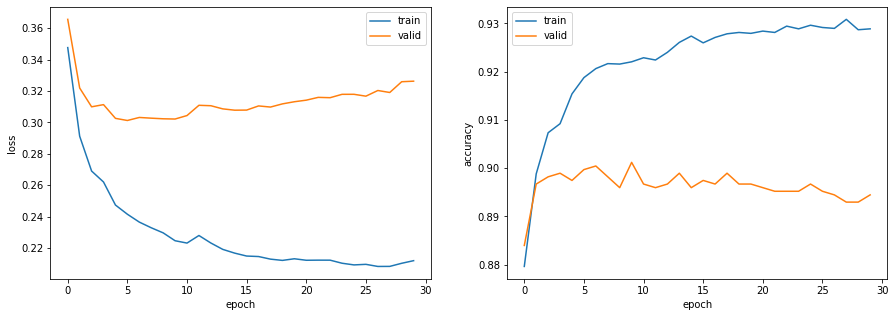

In [0]:
from matplotlib import pyplot as plt

# 視覚化
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(np.array(log_train).T[0], label='train')
ax[0].plot(np.array(log_valid).T[0], label='valid')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()
ax[1].plot(np.array(log_train).T[1], label='train')
ax[1].plot(np.array(log_valid).T[1], label='valid')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend()
plt.show()

## 76. チェックポイント
***
問題75のコードを改変し，各エポックのパラメータ更新が完了するたびに，チェックポイント（学習途中のパラメータ（重み行列など）の値や最適化アルゴリズムの内部状態）をファイルに書き出せ．

In [0]:
# モデルの定義
model = SLPNet(300, 4)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# 学習
num_epochs = 10
log_train = []
log_valid = []
for epoch in range(num_epochs):
  # 訓練モードに設定
  model.train()
  for i, (inputs, labels) in enumerate(dataloader_train):
    # 勾配をゼロで初期化
    optimizer.zero_grad()

    # 順伝播 + 誤差逆伝播 + 重み更新
    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
 
  # 損失と正解率の算出
  loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train)
  loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid)
  log_train.append([loss_train, acc_train])
  log_valid.append([loss_valid, acc_valid])

  # チェックポイントの保存
  torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pt')

  # ログを出力
  print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}')  

epoch: 1, loss_train: 0.3273, accuracy_train: 0.8873, loss_valid: 0.3564, accuracy_valid: 0.8787
epoch: 2, loss_train: 0.2825, accuracy_train: 0.9046, loss_valid: 0.3233, accuracy_valid: 0.8907
epoch: 3, loss_train: 0.2661, accuracy_train: 0.9100, loss_valid: 0.3153, accuracy_valid: 0.8900
epoch: 4, loss_train: 0.2532, accuracy_train: 0.9146, loss_valid: 0.3086, accuracy_valid: 0.8952
epoch: 5, loss_train: 0.2427, accuracy_train: 0.9180, loss_valid: 0.3069, accuracy_valid: 0.8945
epoch: 6, loss_train: 0.2382, accuracy_train: 0.9182, loss_valid: 0.3072, accuracy_valid: 0.8937
epoch: 7, loss_train: 0.2328, accuracy_train: 0.9212, loss_valid: 0.3053, accuracy_valid: 0.8975
epoch: 8, loss_train: 0.2286, accuracy_train: 0.9235, loss_valid: 0.3060, accuracy_valid: 0.8952
epoch: 9, loss_train: 0.2271, accuracy_train: 0.9245, loss_valid: 0.3080, accuracy_valid: 0.8922
epoch: 10, loss_train: 0.2319, accuracy_train: 0.9209, loss_valid: 0.3170, accuracy_valid: 0.8952


## 77. ミニバッチ化
***
問題76のコードを改変し，$B$事例ごとに損失・勾配を計算し，行列$W$の値を更新せよ（ミニバッチ化）．$B$の値を$1,2,4,8,…$と変化させながら，1エポックの学習に要する時間を比較せよ．

In [0]:
import time

def train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, num_epochs):
  # dataloaderの作成
  dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
  dataloader_valid = DataLoader(dataset_valid, batch_size=len(dataset_valid), shuffle=False)

  # 学習
  log_train = []
  log_valid = []
  for epoch in range(num_epochs):
    # 開始時刻の記録
    s_time = time.time()

    # 訓練モードに設定
    model.train()
    for i, (inputs, labels) in enumerate(dataloader_train):
      # 勾配をゼロで初期化
      optimizer.zero_grad()

      # 順伝播 + 誤差逆伝播 + 重み更新
      outputs = model.forward(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
  
    # 損失と正解率の算出
    loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train)
    loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid)
    log_train.append([loss_train, acc_train])
    log_valid.append([loss_valid, acc_valid])

    # チェックポイントの保存
    torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pt')

    # 終了時刻の記録
    e_time = time.time()

    # ログを出力
    print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}, {(e_time - s_time):.4f}sec') 

  return {'train': log_train, 'valid': log_valid}

In [0]:
# datasetの作成
dataset_train = CreateDataset(X_train, y_train)
dataset_valid = CreateDataset(X_valid, y_valid)

# モデルの定義
model = SLPNet(300, 4)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# モデルの学習
for batch_size in [2 ** i for i in range(11)]:
  print(f'バッチサイズ: {batch_size}')
  log = train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, 1)

バッチサイズ: 1
epoch: 1, loss_train: 0.3237, accuracy_train: 0.8888, loss_valid: 0.3476, accuracy_valid: 0.8817, 5.4416sec
バッチサイズ: 2
epoch: 1, loss_train: 0.2966, accuracy_train: 0.8999, loss_valid: 0.3258, accuracy_valid: 0.8847, 3.0029sec
バッチサイズ: 4
epoch: 1, loss_train: 0.2883, accuracy_train: 0.8999, loss_valid: 0.3222, accuracy_valid: 0.8862, 1.5988sec
バッチサイズ: 8
epoch: 1, loss_train: 0.2835, accuracy_train: 0.9023, loss_valid: 0.3179, accuracy_valid: 0.8907, 0.8732sec
バッチサイズ: 16
epoch: 1, loss_train: 0.2817, accuracy_train: 0.9038, loss_valid: 0.3164, accuracy_valid: 0.8907, 0.5445sec
バッチサイズ: 32
epoch: 1, loss_train: 0.2810, accuracy_train: 0.9038, loss_valid: 0.3159, accuracy_valid: 0.8900, 0.3482sec
バッチサイズ: 64
epoch: 1, loss_train: 0.2806, accuracy_train: 0.9040, loss_valid: 0.3157, accuracy_valid: 0.8900, 0.2580sec
バッチサイズ: 128
epoch: 1, loss_train: 0.2806, accuracy_train: 0.9041, loss_valid: 0.3156, accuracy_valid: 0.8900, 0.1984sec
バッチサイズ: 256
epoch: 1, loss_train: 0.2801, accuracy_

## 78. GPU上での学習
***
問題77のコードを改変し，GPU上で学習を実行せよ．

In [0]:
def calculate_loss_and_accuracy(model, criterion, loader, device):
  model.eval()
  loss = 0.0
  total = 0
  correct = 0
  with torch.no_grad():
    for inputs, labels in loader:
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model(inputs)
      loss += criterion(outputs, labels).item()
      pred = torch.argmax(outputs, dim=-1)
      total += len(inputs)
      correct += (pred == labels).sum().item()
      
  return loss / len(loader), correct / total
  

def train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, num_epochs, device=None):
  # GPUに送る
  model.to(device)

  # dataloaderの作成
  dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
  dataloader_valid = DataLoader(dataset_valid, batch_size=len(dataset_valid), shuffle=False)

  # 学習
  log_train = []
  log_valid = []
  for epoch in range(num_epochs):
    # 開始時刻の記録
    s_time = time.time()

    # 訓練モードに設定
    model.train()
    for i, (inputs, labels) in enumerate(dataloader_train):
      # 勾配をゼロで初期化
      optimizer.zero_grad()

      # 順伝播 + 誤差逆伝播 + 重み更新
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model.forward(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
    
    # 損失と正解率の算出
    loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train, device)
    loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid, device)
    log_train.append([loss_train, acc_train])
    log_valid.append([loss_valid, acc_valid])

    # チェックポイントの保存
    torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pt')

    # 終了時刻の記録
    e_time = time.time()

    # ログを出力
    print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}, {(e_time - s_time):.4f}sec') 

  return {'train': log_train, 'valid': log_valid}

In [0]:
# datasetの作成
dataset_train = CreateDataset(X_train, y_train)
dataset_valid = CreateDataset(X_valid, y_valid)

# モデルの定義
model = SLPNet(300, 4)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# デバイスの指定
device = torch.device('cuda')
for batch_size in [2 ** i for i in range(11)]:
  print(f'バッチサイズ: {batch_size}')
  log = train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, 1, device=device)

バッチサイズ: 1
epoch: 1, loss_train: 0.3300, accuracy_train: 0.8874, loss_valid: 0.3584, accuracy_valid: 0.8772, 9.0342sec
バッチサイズ: 2
epoch: 1, loss_train: 0.3025, accuracy_train: 0.8994, loss_valid: 0.3374, accuracy_valid: 0.8870, 4.6391sec
バッチサイズ: 4
epoch: 1, loss_train: 0.2938, accuracy_train: 0.9005, loss_valid: 0.3321, accuracy_valid: 0.8855, 2.4228sec
バッチサイズ: 8
epoch: 1, loss_train: 0.2894, accuracy_train: 0.9039, loss_valid: 0.3299, accuracy_valid: 0.8855, 1.2517sec
バッチサイズ: 16
epoch: 1, loss_train: 0.2876, accuracy_train: 0.9038, loss_valid: 0.3285, accuracy_valid: 0.8855, 0.7149sec
バッチサイズ: 32
epoch: 1, loss_train: 0.2867, accuracy_train: 0.9050, loss_valid: 0.3280, accuracy_valid: 0.8862, 0.4323sec
バッチサイズ: 64
epoch: 1, loss_train: 0.2863, accuracy_train: 0.9050, loss_valid: 0.3277, accuracy_valid: 0.8862, 0.2834sec
バッチサイズ: 128
epoch: 1, loss_train: 0.2869, accuracy_train: 0.9051, loss_valid: 0.3276, accuracy_valid: 0.8862, 0.2070sec
バッチサイズ: 256
epoch: 1, loss_train: 0.2864, accuracy_

## 79. 多層ニューラルネットワーク
***
問題78のコードを改変し，バイアス項の導入や多層化など，ニューラルネットワークの形状を変更しながら，高性能なカテゴリ分類器を構築せよ．

In [0]:
from torch.nn import functional as F

class MLPNet(nn.Module):
  def __init__(self, input_size, mid_size, output_size, mid_layers):
    super().__init__()
    self.mid_layers = mid_layers
    self.fc = nn.Linear(input_size, mid_size)
    self.fc_mid = nn.Linear(mid_size, mid_size)
    self.fc_out = nn.Linear(mid_size, output_size) 
    self.bn = nn.BatchNorm1d(mid_size)

  def forward(self, x):
    x = F.relu(self.fc(x))
    for _ in range(self.mid_layers):
      x = F.relu(self.bn(self.fc_mid(x)))
    x = F.relu(self.fc_out(x))
 
    return x

In [0]:
from torch import optim

def calculate_loss_and_accuracy(model, criterion, loader, device):
  model.eval()
  loss = 0.0
  total = 0
  correct = 0
  with torch.no_grad():
    for inputs, labels in loader:
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model(inputs)
      loss += criterion(outputs, labels).item()
      pred = torch.argmax(outputs, dim=-1)
      total += len(inputs)
      correct += (pred == labels).sum().item()
      
  return loss / len(loader), correct / total
  

def train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, num_epochs, device=None):
  # GPUに送る
  model.to(device)

  # dataloaderの作成
  dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
  dataloader_valid = DataLoader(dataset_valid, batch_size=len(dataset_valid), shuffle=False)

  # スケジューラの設定
  scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs, eta_min=1e-5, last_epoch=-1)

  # 学習
  log_train = []
  log_valid = []
  for epoch in range(num_epochs):
    # 開始時刻の記録
    s_time = time.time()

    # 訓練モードに設定
    model.train()
    for i, (inputs, labels) in enumerate(dataloader_train):
      # 勾配をゼロで初期化
      optimizer.zero_grad()

      # 順伝播 + 誤差逆伝播 + 重み更新
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model.forward(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
    
    # 損失と正解率の算出
    loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train, device)
    loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid, device)
    log_train.append([loss_train, acc_train])
    log_valid.append([loss_valid, acc_valid])

    # チェックポイントの保存
    torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pt')

    # 終了時刻の記録
    e_time = time.time()

    # ログを出力
    print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}, {(e_time - s_time):.4f}sec') 

    # 検証データの損失が3エポック連続で低下しなかった場合は学習終了
    if epoch > 2 and log_valid[epoch - 3][0] <= log_valid[epoch - 2][0] <= log_valid[epoch - 1][0] <= log_valid[epoch][0]:
      break

    # スケジューラを1ステップ進める
    scheduler.step()

  return {'train': log_train, 'valid': log_valid}

In [0]:
# datasetの作成
dataset_train = CreateDataset(X_train, y_train)
dataset_valid = CreateDataset(X_valid, y_valid)

# モデルの定義
model = MLPNet(300, 200, 4, 1)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

# デバイスの指定
device = torch.device('cuda')
log = train_model(dataset_train, dataset_valid, 64, model, criterion, optimizer, 1000, device)

epoch: 1, loss_train: 1.1176, accuracy_train: 0.6679, loss_valid: 1.1150, accuracy_valid: 0.6572, 0.4695sec
epoch: 2, loss_train: 0.8050, accuracy_train: 0.7620, loss_valid: 0.8005, accuracy_valid: 0.7687, 0.4521sec
epoch: 3, loss_train: 0.6972, accuracy_train: 0.7727, loss_valid: 0.6937, accuracy_valid: 0.7784, 0.4515sec
epoch: 4, loss_train: 0.6427, accuracy_train: 0.7764, loss_valid: 0.6412, accuracy_valid: 0.7829, 0.5302sec
epoch: 5, loss_train: 0.6075, accuracy_train: 0.7799, loss_valid: 0.6078, accuracy_valid: 0.7844, 0.4449sec
epoch: 6, loss_train: 0.5763, accuracy_train: 0.7882, loss_valid: 0.5793, accuracy_valid: 0.7897, 0.4368sec
epoch: 7, loss_train: 0.5498, accuracy_train: 0.7976, loss_valid: 0.5548, accuracy_valid: 0.7979, 0.4458sec
epoch: 8, loss_train: 0.5268, accuracy_train: 0.8055, loss_valid: 0.5333, accuracy_valid: 0.8099, 0.4456sec
epoch: 9, loss_train: 0.5088, accuracy_train: 0.8176, loss_valid: 0.5166, accuracy_valid: 0.8174, 0.4478sec
epoch: 10, loss_train: 0.490

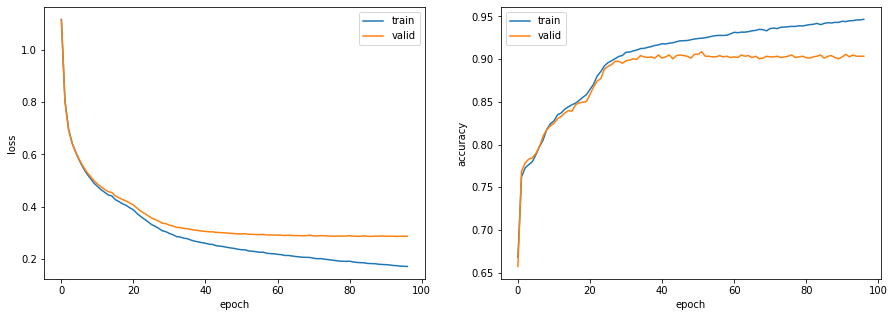

In [0]:
# 視覚化
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(np.array(log['train']).T[0], label='train')
ax[0].plot(np.array(log['valid']).T[0], label='valid')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()
ax[1].plot(np.array(log['train']).T[1], label='train')
ax[1].plot(np.array(log['valid']).T[1], label='valid')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend()
plt.show()

In [0]:
def calculate_accuracy(model, loader, device):
  model.eval()
  total = 0
  correct = 0
  with torch.no_grad():
    for inputs, labels in loader:
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model(inputs)
      pred = torch.argmax(outputs, dim=-1)
      total += len(inputs)
      correct += (pred == labels).sum().item()
      
  return correct / total

In [0]:
# 正解率の確認
acc_train = calculate_accuracy(model, dataloader_train, device)
acc_test = calculate_accuracy(model, dataloader_test, device)
print(f'正解率（学習データ）：{acc_train:.3f}')
print(f'正解率（評価データ）：{acc_test:.3f}')

正解率（学習データ）：0.947
正解率（評価データ）：0.921
